In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
data = pd.read_csv('train.csv')
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [7]:
data.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

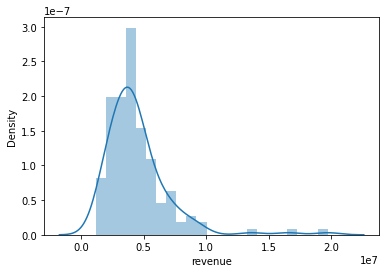

In [8]:
import seaborn as sns
sns.distplot(data.revenue)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

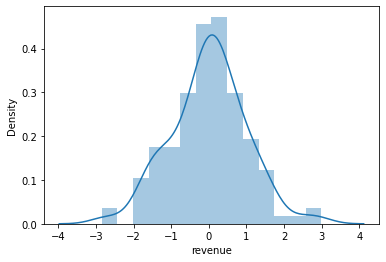

In [9]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer(method= 'box-cox')
data['revenue']=p.fit_transform(data[['revenue']])
sns.distplot(data.revenue)

In [10]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [11]:
data['Open_Date'] = data['Open Date']


In [12]:
data.iloc[:,1].unique()

array(['07/17/1999', '02/14/2008', '03/09/2013', '02/02/2012',
       '05/09/2009', '02/12/2010', '10/11/2010', '06/21/2011',
       '08/28/2010', '11/16/2011', '08/09/2013', '05/22/2012',
       '02/28/2013', '10/16/2010', '12/29/2011', '02/07/2012',
       '01/07/2000', '11/08/2009', '04/21/2012', '08/16/2011',
       '08/25/2010', '01/25/2014', '07/01/2006', '06/03/2009',
       '09/20/2009', '12/23/2011', '02/23/2010', '10/09/1999',
       '01/28/1998', '10/13/2006', '12/01/2008', '12/31/2012',
       '01/17/2009', '04/23/2013', '03/21/2012', '05/08/1996',
       '05/09/2008', '08/23/2010', '01/18/2011', '03/28/2009',
       '02/09/2011', '06/01/2009', '09/27/2011', '09/24/2009',
       '10/13/2004', '08/25/2011', '12/23/2009', '12/21/2011',
       '04/01/2008', '05/01/2010', '11/08/2011', '11/12/2013',
       '03/29/2013', '06/05/1999', '08/12/2008', '03/16/2013',
       '06/21/2008', '04/11/2012', '12/01/2007', '05/01/2012',
       '05/30/2008', '11/15/2010', '08/05/2013', '07/13

In [13]:
import pandas as pd
data.Open_Date = pd.to_datetime(data.Open_Date,dayfirst = False)

In [14]:
data[['year']] = pd.DataFrame(data.Open_Date.dt.year)
data[['day']] = pd.DataFrame(data.Open_Date.dt.day)
data[['month']] = pd.DataFrame(data.Open_Date.dt.month)

In [15]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P33,P34,P35,P36,P37,revenue,Open_Date,year,day,month
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,5,4,3,4,0.776212,1999-07-17,1999,17,7
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,1.168781,2008-02-14,2008,14,2
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,-1.407363,2013-03-09,2013,9,3
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,6,18,12,12,6,-0.800613,2012-02-02,2012,2,2
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,2,3,4,3,3,0.231176,2009-05-09,2009,9,5


In [16]:
data.drop(columns=['Id','Open Date','Open_Date','City','Type'],inplace=True)
data

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P32,P33,P34,P35,P36,P37,revenue,year,day,month
0,Big Cities,4,5.0,4.0,4.0,2,2,5,4,5,...,4,5,5,4,3,4,0.776212,1999,17,7
1,Big Cities,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,1.168781,2008,14,2
2,Other,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,-1.407363,2013,9,3
3,Other,6,4.5,6.0,6.0,4,4,10,8,10,...,10,6,18,12,12,6,-0.800613,2012,2,2
4,Other,3,4.0,3.0,4.0,2,2,5,5,5,...,3,2,3,4,3,3,0.231176,2009,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,2,3.0,3.0,5.0,4,2,4,4,4,...,0,0,0,0,0,0,0.822272,2008,25,6
133,Big Cities,4,5.0,4.0,4.0,2,3,5,4,4,...,0,0,0,0,0,0,1.709230,2006,12,10
134,Other,3,4.0,4.0,4.0,2,3,5,5,5,...,0,0,0,0,0,0,-0.913678,2006,8,7
135,Big Cities,4,5.0,4.0,5.0,2,2,5,5,5,...,0,0,0,0,0,0,1.247812,2010,29,10


In [17]:
x= data.drop(columns= ['revenue'])
y=data.revenue

In [18]:
x.iloc[:,0].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [19]:
x.iloc[:,38].unique()

array([1999, 2008, 2013, 2012, 2009, 2010, 2011, 2000, 2014, 2006, 1998,
       1996, 2004, 2007, 2005, 2002, 1997], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [21]:
x_train

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P31,P32,P33,P34,P35,P36,P37,year,day,month
57,Other,2,3.0,4.0,3.0,1,4,5,5,5,...,0,0,0,0,0,0,0,2008,21,6
129,Other,4,5.0,5.0,4.0,2,2,5,4,5,...,0,0,0,0,0,0,0,2007,8,2
75,Big Cities,5,5.0,4.0,5.0,1,4,5,3,4,...,0,0,0,0,0,0,0,2005,15,10
111,Other,2,3.0,4.0,4.0,2,1,5,5,5,...,0,0,0,0,0,0,0,2012,10,8
59,Big Cities,4,5.0,4.0,4.0,1,3,5,5,5,...,0,0,0,0,0,0,0,2007,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Other,2,2.0,4.0,4.0,2,2,4,4,5,...,0,0,0,0,0,0,0,2011,8,11
99,Big Cities,4,5.0,4.0,4.0,2,4,5,4,4,...,5,4,2,5,5,5,3,1999,18,12
117,Big Cities,3,5.0,4.0,5.0,3,3,5,4,4,...,3,3,2,3,4,3,1,2005,27,12
15,Big Cities,12,7.5,6.0,6.0,2,10,10,10,10,...,15,20,2,12,3,16,4,2012,7,2


In [22]:
num_col = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40]
ord_col = []
nomi_col = [0]

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, StandardScaler
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse=False),nomi_col),
                                (StandardScaler(),num_col),
                                 remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0]),
                                ('standardscaler', StandardScaler(),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                  26, 27, 28, 29, 30, ...])])

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pipe = make_pipeline(trans,model)

In [25]:
pipe.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...])])),
                ('linearregression', LinearRegression())])

In [26]:
pred = pipe.predict(x_test)
pred

array([ 0.09885349,  0.15136029, -1.7011727 , -0.44278604, -1.33706595,
        0.71659273,  0.9515295 ,  0.83528134,  0.13007097,  0.0793693 ,
       -1.30271204,  0.23200766, -0.13603018,  0.00709852, -0.55453636,
        1.15712316,  3.77073038,  5.05767053,  0.60124297, -0.37130593,
        3.00540208, -1.0993073 , -1.73065991,  2.57460087,  0.3849294 ,
        0.68531338, -0.87915323, -0.41078536, -0.64449061, -0.97855295,
        0.09044466, -0.04896387,  0.06175437, -0.17817501,  0.05823282])

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

3.193896649115663

In [29]:
pipe.score(x_train,y_train)

0.45905864195579527